In [114]:
import pandas as pd
pd.options.display.precision = 3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

In [110]:
df = pd.read_csv('platinum_flat_file.csv')
df.head(2).T

,0,1
MUTATION,I84V,V82A
AFFIN.CHAIN,A,A
AFFIN.LIG_ID,017,017
AFFIN.LIG_NAME,"(3R,3AS,6AR)-HEXAHYDROFURO[2,3-B]FURAN-3- YL(1...","(3R,3AS,6AR)-HEXAHYDROFURO[2,3-B]FURAN-3- YL(1..."
AFFIN.PDB_ID,2IEN,2IEN
MUT.UNIPROT,P03367,P03367
AFFIN.EXPTAL_METHOD,kinetic,kinetic
AFFIN.TEMPERATURE,NR,NR
AFFIN.PH,5,5
AFFIN.K_WT,1,1


In [47]:
# df.describe()でLigand情報の統計量が含まれていない
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AFFIN.K_WT,1008.0,2.220e+06,3.612e+07,5.770e-05,5.900,380.000,5000.000,8.370e+08
AFFIN.DELTA_K,986.0,3.016e+05,2.654e+07,-4.200e+08,-5658.750,-90.700,1.090,5.600e+08
AFFIN.FOLD_CHANGE,986.0,-9.194e+02,1.651e+04,-4.234e+05,-10.697,-2.778,1.120,1.765e+03
MUT.DISTANCE_TO_LIG,1008.0,5.307e+00,4.875e+00,2.402e+00,3.115,3.643,5.129,5.264e+01
MUT.DUET_STABILITY,689.0,-1.051e+00,8.957e-01,-3.888e+00,-1.545,-0.957,-0.464,2.808e+00
PROT.RESOLUTION,1008.0,2.022e+00,4.347e-01,6.600e-01,1.800,2.000,2.300,3.420e+00
PROT.R_VALUE,1008.0,1.869e-01,3.978e-02,0.000e+00,0.174,0.190,0.212,2.610e-01
PROT.R_FREE,1008.0,2.023e-01,8.573e-02,0.000e+00,0.198,0.232,0.251,3.290e-01
PROT.PH,1008.0,5.534e+00,2.404e+00,0.000e+00,4.800,6.100,7.400,9.500e+00
PROT.TEMPERATURE,1008.0,1.230e+02,7.885e+01,0.000e+00,100.000,100.000,110.000,2.980e+02


In [3]:
# datatypeの行 'dtype'を最後にSeriesで追加
# df.loc['dtype'] = pd.Series(df.dtypes)

In [48]:
# dtypeがfloat64ではなくobjectになっている．
df.dtypes

MUTATION                    object
AFFIN.CHAIN                 object
AFFIN.LIG_ID                object
AFFIN.LIG_NAME              object
AFFIN.PDB_ID                object
MUT.UNIPROT                 object
AFFIN.EXPTAL_METHOD         object
AFFIN.TEMPERATURE           object
AFFIN.PH                    object
AFFIN.K_WT                 float64
AFFIN.K_MT                  object
AFFIN.DELTA_K              float64
AFFIN.FOLD_CHANGE          float64
AFFIN.UNIT                  object
MUT.MT_PDB                  object
MUT.WT_PDB                  object
MUT.IN_BINDING_SITE         object
MUT.DISTANCE_TO_LIG        float64
MUT.DOI                     object
MUT.PMID                    object
MUT.IS_SINGLE_POINT         object
MUT.MCSM_PPI                object
MUT.DUET_STABILITY         float64
MUT.RESIDUE_RSA             object
MUT.RESIDUE_SST             object
MUT.RESIDUE_HBOND           object
 PROT.MOLECULE_NAME         object
PROT.ORGANISM               object
PROT.RESOLUTION     

In [95]:
# like = keyword の含まれるカラムをフィルター
LIG = df.filter(like='LIG.')
LIG.T

,0,1,2,3,4,5,6,7,8,9,...,998,999,1000,1001,1002,1003,1004,1005,1006,1007
LIG.PDBE,<a href=http://www.ebi.ac.uk/pdbe-srv/pdbechem...,<a href=http://www.ebi.ac.uk/pdbe-srv/pdbechem...,<a href=http://www.ebi.ac.uk/pdbe-srv/pdbechem...,<a href=http://www.ebi.ac.uk/pdbe-srv/pdbechem...,<a href=http://www.ebi.ac.uk/pdbe-srv/pdbechem...,<a href=http://www.ebi.ac.uk/pdbe-srv/pdbechem...,<a href=http://www.ebi.ac.uk/pdbe-srv/pdbechem...,<a href=http://www.ebi.ac.uk/pdbe-srv/pdbechem...,<a href=http://www.ebi.ac.uk/pdbe-srv/pdbechem...,<a href=http://www.ebi.ac.uk/pdbe-srv/pdbechem...,...,<a href=http://www.ebi.ac.uk/pdbe-srv/pdbechem...,<a href=http://www.ebi.ac.uk/pdbe-srv/pdbechem...,<a href=http://www.ebi.ac.uk/pdbe-srv/pdbechem...,<a href=http://www.ebi.ac.uk/pdbe-srv/pdbechem...,<a href=http://www.ebi.ac.uk/pdbe-srv/pdbechem...,<a href=http://www.ebi.ac.uk/pdbe-srv/pdbechem...,<a href=http://www.ebi.ac.uk/pdbe-srv/pdbechem...,<a href=http://www.ebi.ac.uk/pdbe-srv/pdbechem...,<a href=http://www.ebi.ac.uk/pdbe-srv/pdbechem...,<a href=http://www.ebi.ac.uk/pdbe-srv/pdbechem...
LIG.CANONICAL_SMILES,CC(C)C[N@@](C[C@H]([C@H](Cc1ccccc1)NC(=O)O[C@H...,CC(C)C[N@@](C[C@H]([C@H](Cc1ccccc1)NC(=O)O[C@H...,CC(C)C[N@@](C[C@H]([C@H](Cc1ccccc1)NC(=O)O[C@H...,CC(C)C[N@@](C[C@H]([C@H](Cc1ccccc1)NC(=O)O[C@H...,CC(C)C[N@@](C[C@H]([C@H](Cc1ccccc1)NC(=O)O[C@H...,CC(C)C[N@@](C[C@H]([C@H](Cc1ccccc1)NC(=O)O[C@H...,CC(C)C[N@@](C[C@H]([C@H](Cc1ccccc1)NC(=O)O[C@H...,CC(C)C[N@@](C[C@H]([C@H](Cc1ccccc1)NC(=O)O[C@H...,CC(C)C[N@@](C[C@H]([C@H](Cc1ccccc1)NC(=O)O[C@H...,CC(C)C[N@@](C[C@H]([C@H](Cc1ccccc1)NC(=O)O[C@H...,...,c1ccc2c(c1)C(=NN(C2=O)Cc3nc4cc(ccc4s3)C(F)(F)F...,c1ccc2c(c1)C(=NN(C2=O)Cc3nc4cc(ccc4s3)C(F)(F)F...,c1ccc2c(c1)C(=NN(C2=O)Cc3nc4cc(ccc4s3)C(F)(F)F...,c1ccc2c(c1)C(=NN(C2=O)Cc3nc4cc(ccc4s3)C(F)(F)F...,c1ccc2c(c1)C(=NN(C2=O)Cc3nc4cc(ccc4s3)C(F)(F)F...,c1ccc2c(c1)C(=NN(C2=O)Cc3nc4cc(ccc4s3)C(F)(F)F...,c1ccc2c(c1)C(=NN(C2=O)Cc3nc4cc(ccc4s3)C(F)(F)F...,c1ccc2c(c1)C(=NN(C2=O)Cc3nc4cc(ccc4s3)C(F)(F)F...,c1ccc2c(c1)C(=NN(C2=O)Cc3nc4cc(ccc4s3)C(F)(F)F...,c1cc(c(c(c1)F)C2=NCc3cnc(nc3-c4c2cc(cc4)Cl)Nc5...
LIG.POLYMER_TYPE,Bound ligand,Bound ligand,Bound ligand,Bound ligand,Bound ligand,Bound ligand,Bound ligand,Bound ligand,Bound ligand,Bound ligand,...,Bound ligand,Bound ligand,Bound ligand,Bound ligand,Bound ligand,Bound ligand,Bound ligand,Bound ligand,Bound ligand,Bound ligand
LIG.TYPE_DESCRIPTION,NON-POLYMER,NON-POLYMER,NON-POLYMER,NON-POLYMER,NON-POLYMER,NON-POLYMER,NON-POLYMER,NON-POLYMER,NON-POLYMER,NON-POLYMER,...,NON-POLYMER,NON-POLYMER,NON-POLYMER,NON-POLYMER,NON-POLYMER,NON-POLYMER,NON-POLYMER,NON-POLYMER,NON-POLYMER,non-polymer
LIG.MOL_WEIGHT,547.664,547.664,547.664,547.664,547.664,547.664,547.664,547.664,547.664,547.664,...,419.377,419.377,419.377,419.377,419.377,419.377,419.377,419.377,419.377,476.862
LIG.ATOM_COUNT,38,38,38,38,38,38,38,38,38,38,...,29,29,29,29,29,29,29,29,29,34
LIG.LOGP,3.4561,3.4561,3.4561,3.4561,3.4561,3.4561,3.4561,3.4561,3.4561,3.4561,...,3.592,3.592,3.592,3.592,3.592,3.592,3.592,3.592,3.592,5.7161
LIG.FORMULA,C27 H37 N3 O7 S,C27 H37 N3 O7 S,C27 H37 N3 O7 S,C27 H37 N3 O7 S,C27 H37 N3 O7 S,C27 H37 N3 O7 S,C27 H37 N3 O7 S,C27 H37 N3 O7 S,C27 H37 N3 O7 S,C27 H37 N3 O7 S,...,C19 H12 F3 N3 O3 S,C19 H12 F3 N3 O3 S,C19 H12 F3 N3 O3 S,C19 H12 F3 N3 O3 S,C19 H12 F3 N3 O3 S,C19 H12 F3 N3 O3 S,C19 H12 F3 N3 O3 S,C19 H12 F3 N3 O3 S,C19 H12 F3 N3 O3 S,C25 H15 Cl F2 N4 O2
LIG.NUM_ACCEPTORS,8,8,8,8,8,8,8,8,8,8,...,6,6,6,6,6,6,6,6,6,5
LIG.NUM_DONORS,3,3,3,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,2


In [99]:
# LIG.を含むカラムをリストで返す
LIG = LIG.columns.values.tolist()
LIG

['LIG.PDBE',
 'LIG.CANONICAL_SMILES',
 'LIG.POLYMER_TYPE',
 'LIG.TYPE_DESCRIPTION',
 'LIG.MOL_WEIGHT',
 'LIG.ATOM_COUNT',
 'LIG.LOGP',
 'LIG.FORMULA',
 'LIG.NUM_ACCEPTORS',
 'LIG.NUM_DONORS',
 'LIG.NUM_HETEROATOMS',
 'LIG.NUM_ROTATABLE_BONDS',
 'LIG.NUM_RINGS',
 'LIG.LABUTE_ASA',
 'LIG.TPSA']

In [105]:
# object > float に変換したいリストの作成
LIG = LIG[4:7] + LIG[8:]

In [107]:
for i in LIG:
    df[i] = pd.to_numeric(df[i],errors='coerce')
df.dtypes

MUTATION                    object
AFFIN.CHAIN                 object
AFFIN.LIG_ID                object
AFFIN.LIG_NAME              object
AFFIN.PDB_ID                object
MUT.UNIPROT                 object
AFFIN.EXPTAL_METHOD         object
AFFIN.TEMPERATURE           object
AFFIN.PH                    object
AFFIN.K_WT                 float64
AFFIN.K_MT                  object
AFFIN.DELTA_K              float64
AFFIN.FOLD_CHANGE          float64
AFFIN.UNIT                  object
MUT.MT_PDB                  object
MUT.WT_PDB                  object
MUT.IN_BINDING_SITE         object
MUT.DISTANCE_TO_LIG        float64
MUT.DOI                     object
MUT.PMID                    object
MUT.IS_SINGLE_POINT         object
MUT.MCSM_PPI                object
MUT.DUET_STABILITY         float64
MUT.RESIDUE_RSA             object
MUT.RESIDUE_SST             object
MUT.RESIDUE_HBOND           object
 PROT.MOLECULE_NAME         object
PROT.ORGANISM               object
PROT.RESOLUTION     

In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AFFIN.K_WT,1008.0,2.220e+06,3.612e+07,5.770e-05,5.900,380.000,5000.000,8.370e+08
AFFIN.DELTA_K,986.0,3.016e+05,2.654e+07,-4.200e+08,-5658.750,-90.700,1.090,5.600e+08
AFFIN.FOLD_CHANGE,986.0,-9.194e+02,1.651e+04,-4.234e+05,-10.697,-2.778,1.120,1.765e+03
MUT.DISTANCE_TO_LIG,1008.0,5.307e+00,4.875e+00,2.402e+00,3.115,3.643,5.129,5.264e+01
MUT.DUET_STABILITY,689.0,-1.051e+00,8.957e-01,-3.888e+00,-1.545,-0.957,-0.464,2.808e+00
PROT.RESOLUTION,1008.0,2.022e+00,4.347e-01,6.600e-01,1.800,2.000,2.300,3.420e+00
PROT.R_VALUE,1008.0,1.869e-01,3.978e-02,0.000e+00,0.174,0.190,0.212,2.610e-01
PROT.R_FREE,1008.0,2.023e-01,8.573e-02,0.000e+00,0.198,0.232,0.251,3.290e-01
PROT.PH,1008.0,5.534e+00,2.404e+00,0.000e+00,4.800,6.100,7.400,9.500e+00
PROT.TEMPERATURE,1008.0,1.230e+02,7.885e+01,0.000e+00,100.000,100.000,110.000,2.980e+02


In [150]:
# type(df['LIG.CANONICAL_SMILES'][x] == str
smiles = df['LIG.CANONICAL_SMILES']
type(smiles[2])

str

In [157]:
# Nanが含まれているかを確認
np.nan(smiles)

TypeError: 'float' object is not callable

# Smilesのカラムに入っているNoneを除けない

In [161]:
df[np.nan(smiles)]

TypeError: 'float' object is not callable

In [162]:
smiles = smiles.dropna()
np.nan(smiles)

TypeError: 'float' object is not callable

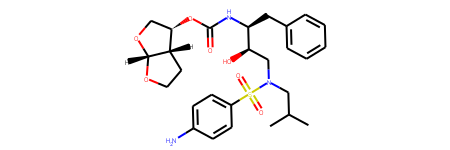

In [133]:
P2 = Chem.MolFromSmiles(df['LIG.CANONICAL_SMILES'][2])
P2

In [148]:
SMILES = [df['LIG.CANONICAL_SMILES'][2]]
Chem.MolFromSmiles(SMILES)

TypeError: No registered converter was able to produce a C++ rvalue of type std::__cxx11::basic_string<wchar_t, std::char_traits<wchar_t>, std::allocator<wchar_t> > from this Python object of type list

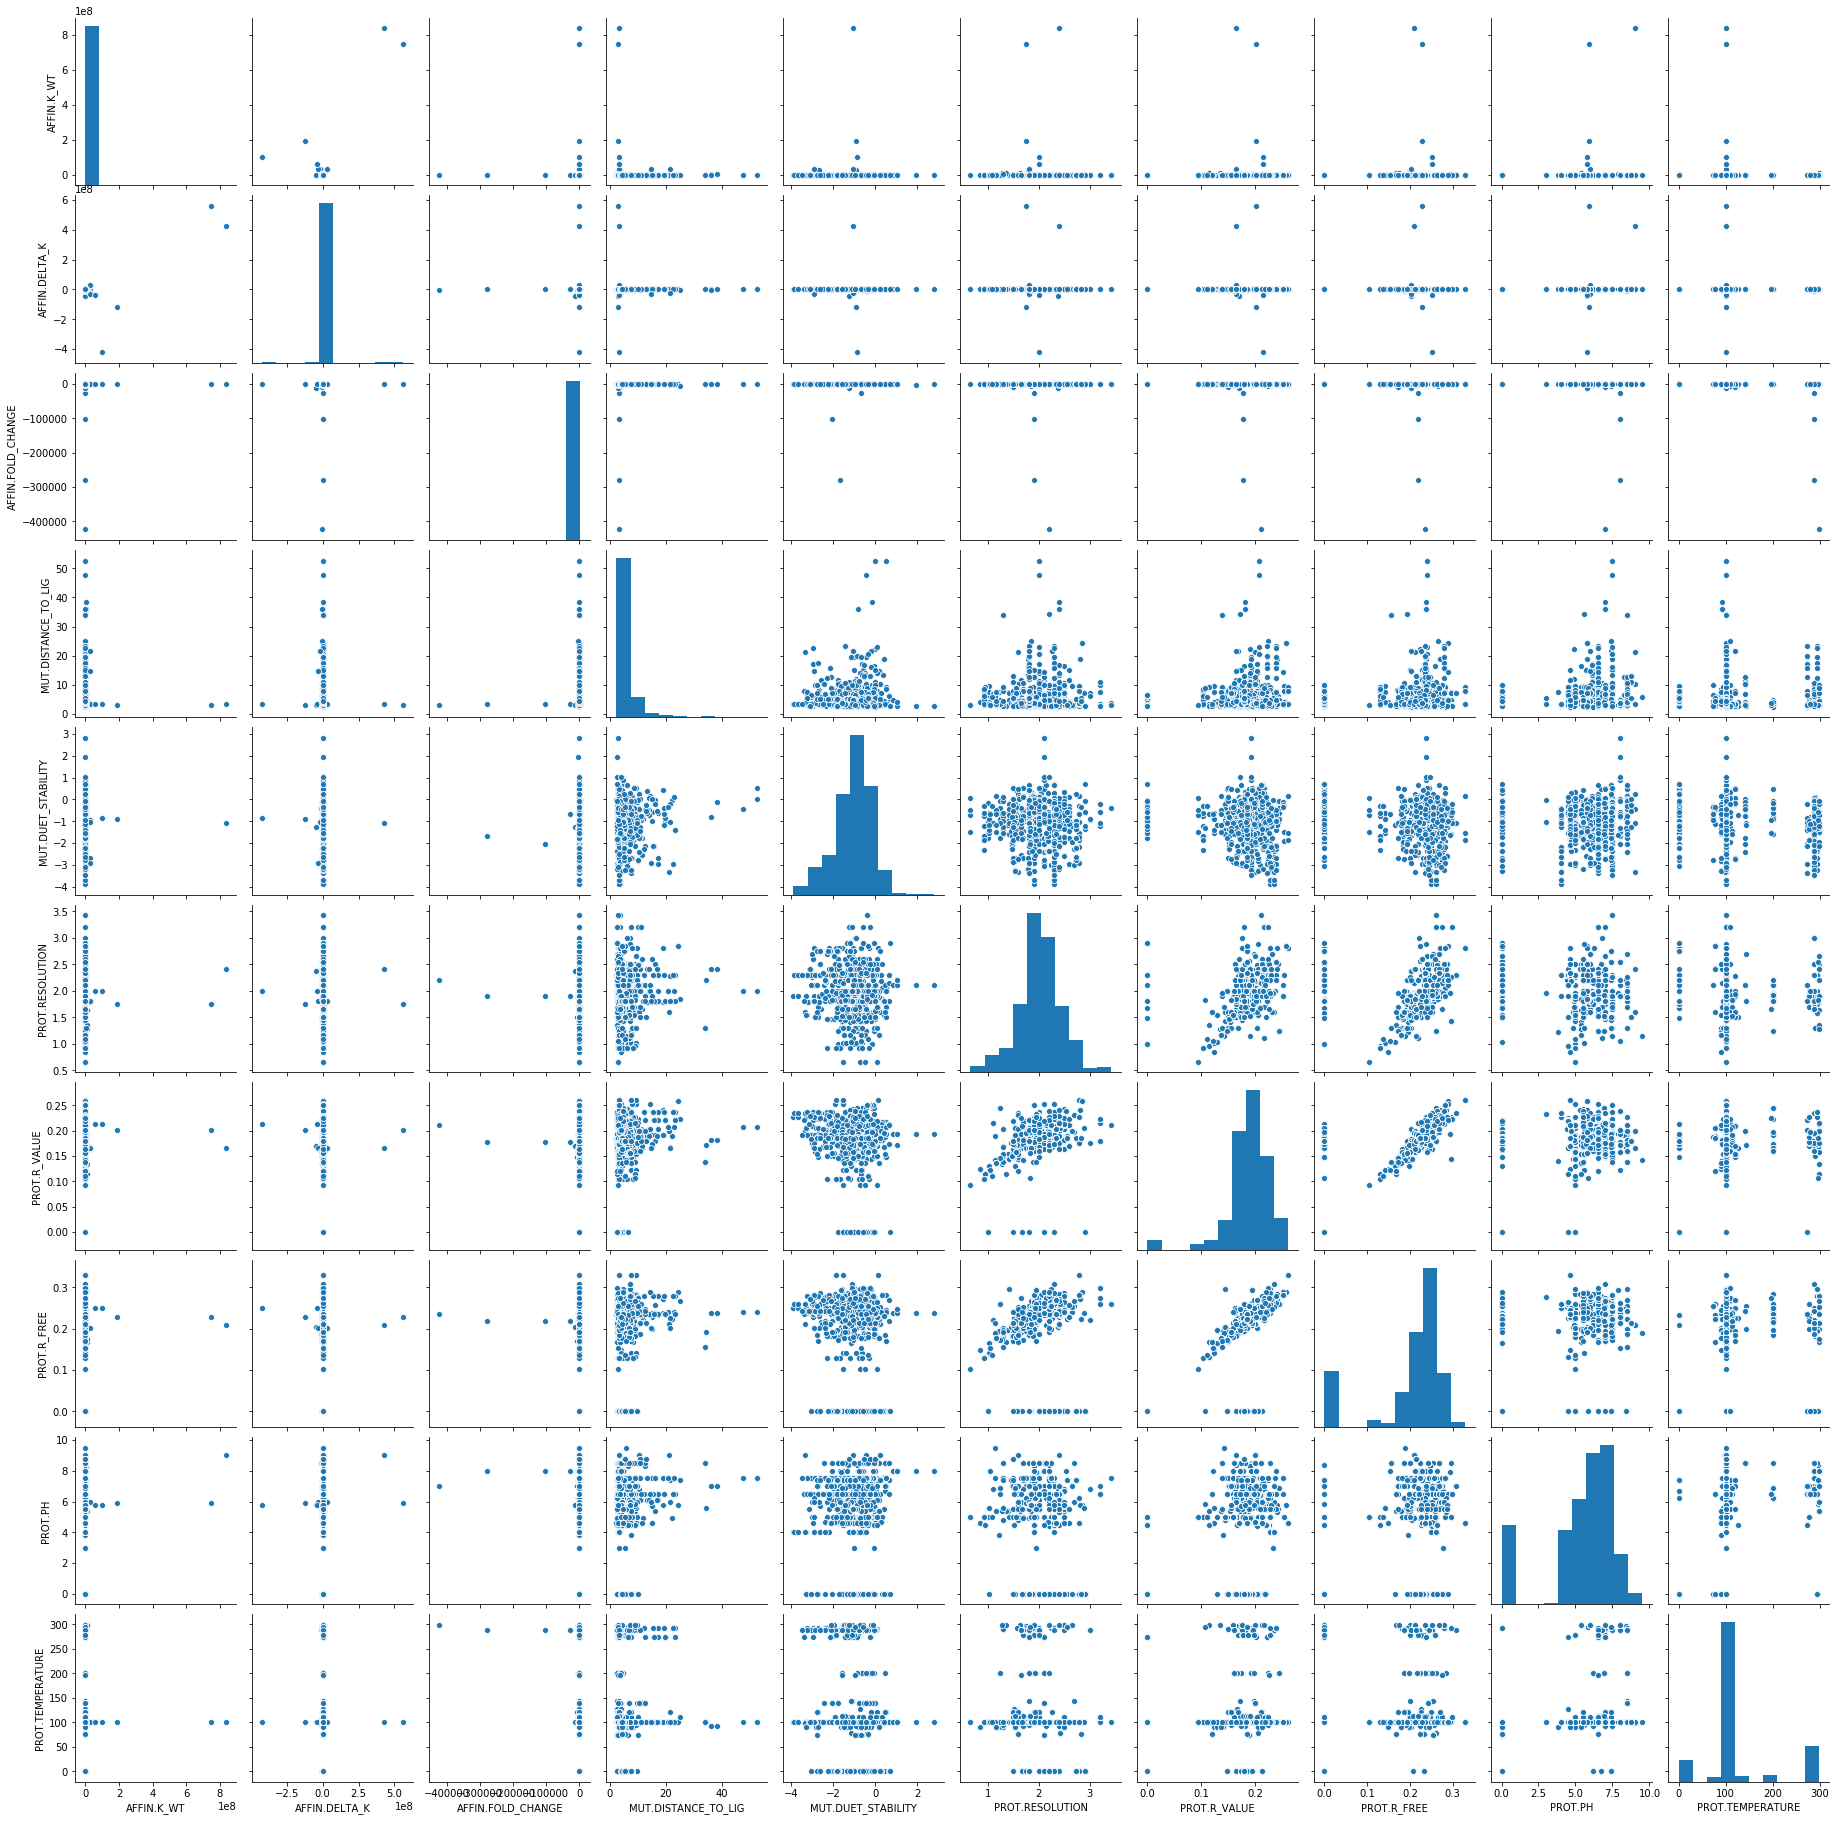

In [163]:
sns.pairplot(df)